# Exercise Lecture 7

The block of code below downloads data from the yfinance library. Instead of using `your_stock` use the acronym of the stock that has been assigned to you.

Running the code you will store the log-returns of your stock for the period 2022-2024, together with APPLE and BITCOIN. Do not change this overall setup.


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt

# Download historical data for Apple (AAPL) and Your Stock
tickers = ["AAPL","BTC-USD", "BIDU"]
start_date = "2022-01-01"
end_date = "2024-12-31"

data = yf.download(tickers, start=start_date, end=end_date, progress=False)["Close"]

# Compute log-returns
log_returns = np.log(data / data.shift(1)).dropna()

# Exercise 1

Create scatterplots of the log-returns between the three stocks. Are they dependent of each other? What behaviour do you observe?


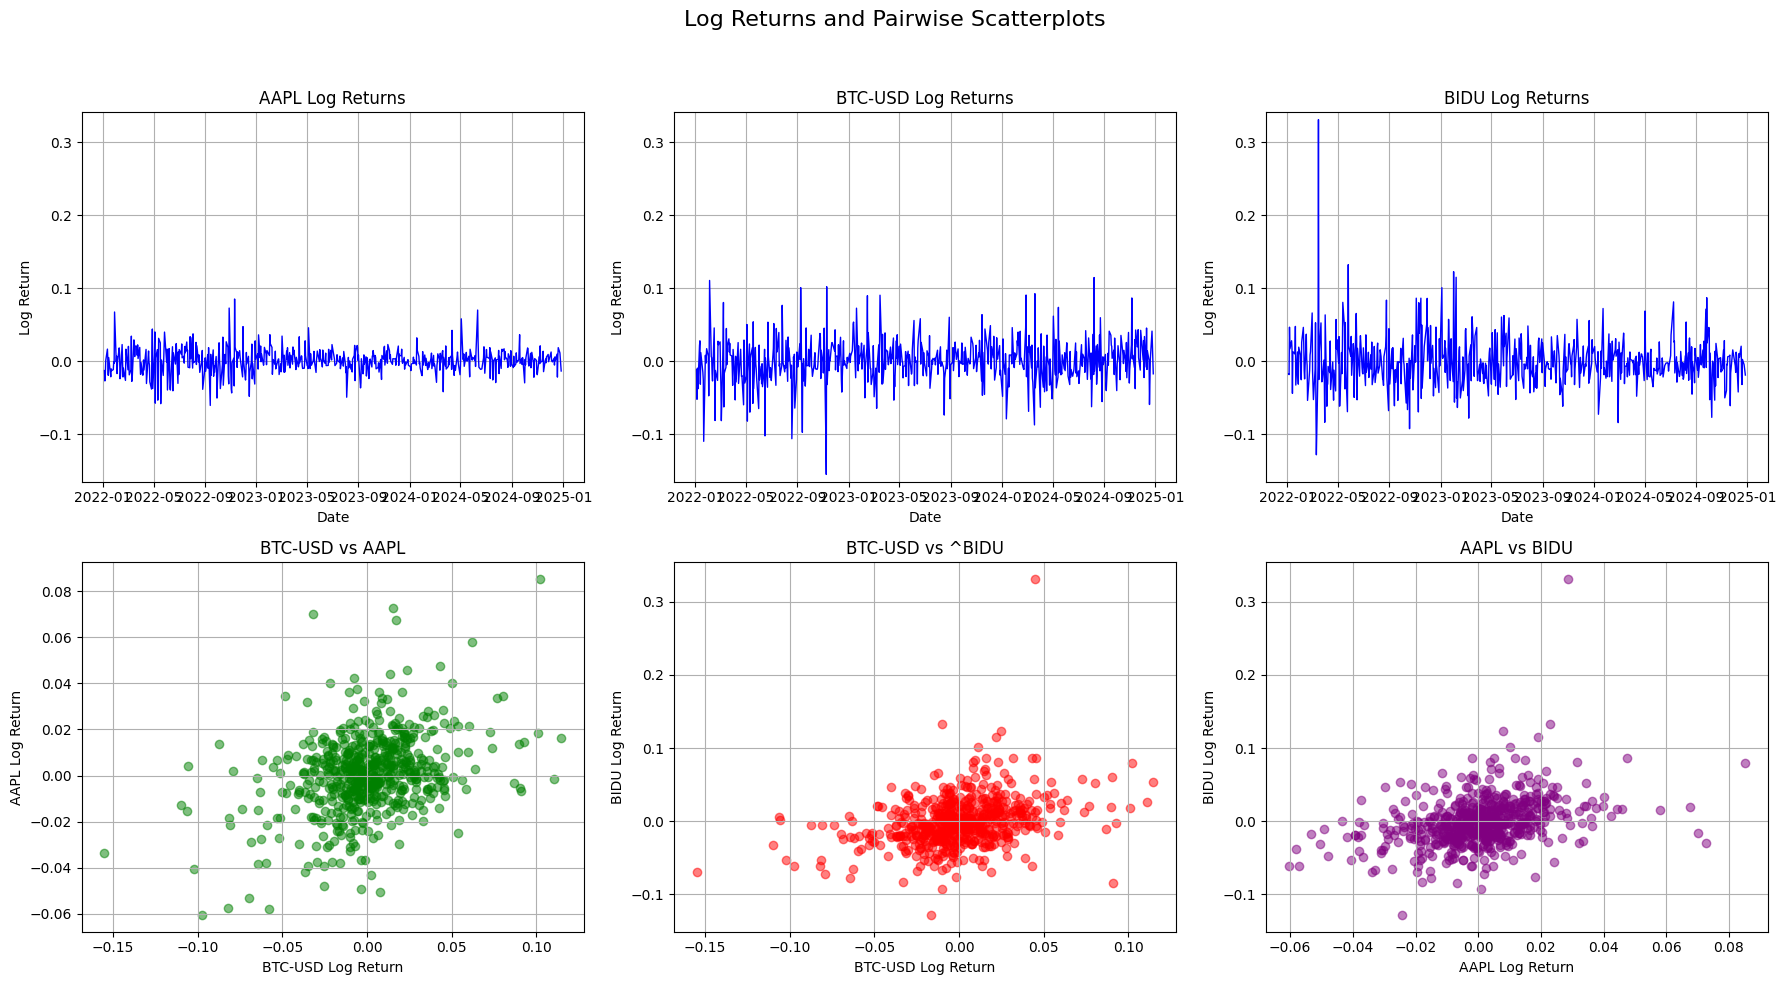

In [5]:
# Determine common y-axis limits for the log return time series
ymin = log_returns.min().min()
ymax = log_returns.max().max()
padding = 0.01  # Optional padding for visual clarity
common_ylim = (ymin - padding, ymax + padding)

# Create a 2x3 plot
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Log Returns and Pairwise Scatterplots', fontsize=16)

# First row: Time series of log returns for each asset with common y-axis limits
for i, ticker in enumerate(tickers):
    axs[0, i].plot(log_returns.index, log_returns[ticker], color='blue', lw=1)
    axs[0, i].set_title(f'{ticker} Log Returns')
    axs[0, i].set_xlabel('Date')
    axs[0, i].set_ylabel('Log Return')
    axs[0, i].grid(True)
    axs[0, i].set_ylim(common_ylim)

# Second row: Pairwise scatterplots (using individual axis scales)
# Bitcoin vs Apple
axs[1, 0].scatter(log_returns['BTC-USD'], log_returns['AAPL'], alpha=0.5, color='green')
axs[1, 0].set_title('BTC-USD vs AAPL')
axs[1, 0].set_xlabel('BTC-USD Log Return')
axs[1, 0].set_ylabel('AAPL Log Return')
axs[1, 0].grid(True)

# Bitcoin vs BIDU
axs[1, 1].scatter(log_returns['BTC-USD'], log_returns['BIDU'], alpha=0.5, color='red')
axs[1, 1].set_title('BTC-USD vs ^BIDU')
axs[1, 1].set_xlabel('BTC-USD Log Return')
axs[1, 1].set_ylabel('BIDU Log Return')
axs[1, 1].grid(True)

# Apple vs BIDU
axs[1, 2].scatter(log_returns['AAPL'], log_returns['BIDU'], alpha=0.5, color='purple')
axs[1, 2].set_title('AAPL vs BIDU')
axs[1, 2].set_xlabel('AAPL Log Return')
axs[1, 2].set_ylabel('BIDU Log Return')
axs[1, 2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("stocks.png")
plt.show()

1. BTC-USD vs AAPL (Left, Green)
- The data points appear widely scattered without a clear trend.
- This suggests that there is no strong linear correlation between BTC-USD and AAPL log-returns.
- Bitcoin, as a cryptocurrency, tends to behave differently from traditional equities, which may explain the lack of dependence.
2. BTC-USD vs BIDU (Middle, Red)
- Similar to BTC-USD vs AAPL, the points are spread out with no clear pattern.
- There might be slight clustering around zero, but overall, it indicates low correlation between Bitcoin and Baidu.
- This is expected since cryptocurrencies and Chinese tech stocks operate in different market dynamics.
3. AAPL vs BIDU (Right, Purple)
- The scatterplot suggests some degree of dependence, as the points seem more concentrated around a weakly positive diagonal trend.
- AAPL and BIDU are both tech stocks, so their returns may exhibit some level of correlation, but likely not strong.

# Exercise 2

Compute the mean vector, covariance and correlation matrix. Do they match your expectations from looking at the scatterplots?

In [8]:
# Calculate the mean of the log returns
mean_returns = log_returns.mean()

# Calculate the covariance matrix of the log returns
cov_matrix = log_returns.cov()

# Calculate the correlation matrix of the log returns
corr_matrix = log_returns.corr()

# Print the results
print("Mean of Log Returns:\n", mean_returns)
print("\nCovariance Matrix:\n", cov_matrix)
print("\nCorrelation Matrix:\n", corr_matrix)

Mean of Log Returns:
 Ticker
AAPL       0.000688
BIDU      -0.000579
BTC-USD    0.000288
dtype: float64

Covariance Matrix:
 Ticker       AAPL      BIDU   BTC-USD
Ticker                               
AAPL     0.000301  0.000212  0.000191
BIDU     0.000212  0.001170  0.000355
BTC-USD  0.000191  0.000355  0.000946

Correlation Matrix:
 Ticker       AAPL      BIDU   BTC-USD
Ticker                               
AAPL     1.000000  0.358114  0.358901
BIDU     0.358114  1.000000  0.336833
BTC-USD  0.358901  0.336833  1.000000


- The covariance values are all positive, meaning these assets generally move in the same direction.
- AAPL and BIDU have a correlation of 0.358, which is weakly positive.
- BTC-USD has a correlation of around 0.359 with AAPL and 0.337 with BIDU, showing a weak positive relationship.
- Since all correlation values are below 0.4, none of these assets are strongly correlated, which matches the scattered nature of the data points in the plots.

# Exercise 3

Consider a portfolio where you invested 50\% of your wealth on your stock,  25\% on Apple and 25\% on Bitcoin. What are the mean and variance of that portfolio?

In [9]:
# Define portfolio weights: 40% BTC, 35% AAPL, 25% SP500
weights = np.array([0.40, 0.35, 0.25])

# Portfolio expected return as the weighted sum of individual expected returns
portfolio_expected_return = np.dot(weights, mean_returns)

# Portfolio variance computed using matrix multiplication
portfolio_variance = np.dot(weights, np.dot(cov_matrix, weights))

# Print the results
print("Portfolio Expected Return:", portfolio_expected_return)
print("Portfolio Variance:", portfolio_variance)

Portfolio Expected Return: 0.00014455411089755462
Portfolio Variance: 0.0004104917976377465


- Mean of portfolio: 0.0001445
- Variance of portfolio: 0.0004104

# Exercise 4

What is the probability that the portfolio will decrease its value assuming a Normal model?


In [10]:
from scipy.stats import norm

# Define the loss threshold (i.e., -5% return)
threshold = -0.05

# Calculate the z-score for the threshold
z_score = (threshold - portfolio_expected_return) / np.sqrt(portfolio_variance)

# Compute the probability of a loss greater than 5%
prob_loss = norm.cdf(z_score)
print("Probability of losing more than 5%:", prob_loss)

Probability of losing more than 5%: 0.006662199049645857
